# cifar10 資料集
* 深度學習 DL: Deep Learning
* 全連接層 FCL: Fully Connected Layer
* 多層神經網路 MLP: Multi-layer Perceptron
```python
import keras
from keras.models import Sequential # 建立MLP
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout # MLP套用 Dense, 並在裡面使用 Dropout
from keras.utils.np_utils import to_categorical # 把答案變成one-hot encoding
from sklearn.metrics import confusion_matrix # 運用confusion_matrix查看預測分佈
```

In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
labels = ["airplane","car","bird","cat","deer","dog","frog","horse","boat","truck"]

23194
airplane


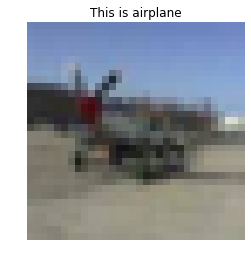

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(c)
plt.axis("off")
# trans[0] -> 飛機
# XX -> trans[[0]]
category = y_train[c][0]
print(labels[category])
plt.title("This is " + labels[category])
plt.imshow(x_train[c])

In [0]:
# 資料的預處理
# 1.題目的預處理(Normalize)
# 卷積不需要攤開，直接進去
x_train_norm = x_train / 255
x_test_norm = x_test / 255


In [6]:
# 答案處理：One-hot
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("before：",y_train[0])
print("after：",y_train_cat[0])

before： [6]
after： [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
cnn = Sequential()
'''
one filter has 3*3 = 9 parameters
one color filter has 3*3*3 = 27 parameters
32 color filters have 27*32 = 864 parameters
864 + 32 activation bias = 896 parameters
kernel_size= filter的長寬
strides=(1,1)：XY步長分別移動1,1
>>kernel_size為基數，strides就為基數
>>kernel_size為偶數，strides就為偶數
padding：補零
'''

cnn.add(Conv2D(64,(3,3), padding="same", activation="relu", input_shape=(32,32,3)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128,(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256,(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512,(3,3), padding="same", activation="relu"))
cnn.add(Flatten())
cnn.add(Dense(512,activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(128,activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10,activation="softmax"))

cnn.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         


In [8]:
cnn.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])

In [9]:
cnn.fit(x_train_norm, y_train_cat,
       batch_size=200,
       epochs=5,
        validation_split=0.1,
       verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 16s - loss: 1.7304 - acc: 0.3541 - val_loss: 1.3685 - val_acc: 0.4932
Epoch 2/5
 - 13s - loss: 1.2447 - acc: 0.5540 - val_loss: 1.1302 - val_acc: 0.5900
Epoch 3/5
 - 13s - loss: 0.9882 - acc: 0.6534 - val_loss: 0.8396 - val_acc: 0.7072
Epoch 4/5
 - 13s - loss: 0.8146 - acc: 0.7162 - val_loss: 0.7611 - val_acc: 0.7334
Epoch 5/5
 - 13s - loss: 0.6799 - acc: 0.7654 - val_loss: 0.6949 - val_acc: 0.7642


In [10]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 242us/step


[0.736808657360077, 0.7473]

In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pre
label = list(range(0,10))
c = [(str(l) + "(預測)") for l in labels]
i = [(str(l) + "(正確)") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
            columns=c, index = i)

,airplane(預測),car(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),boat(預測),truck(預測)
airplane(正確),817,26,23,18,10,3,9,4,49,41
car(正確),11,889,2,8,2,5,6,2,25,50
bird(正確),100,5,602,57,72,54,59,19,22,10
cat(正確),25,8,59,557,53,154,81,26,21,16
deer(正確),27,6,75,73,641,41,60,61,12,4
dog(正確),11,5,40,163,40,660,22,40,8,11
frog(正確),8,5,40,40,23,18,849,3,9,5
horse(正確),17,6,26,44,42,69,3,770,8,15
boat(正確),56,30,8,9,4,3,1,3,870,16
truck(正確),28,93,4,13,1,6,5,7,25,818


In [22]:
pre

array([3, 8, 8, ..., 5, 1, 7])

In [21]:
y_test.reshape(10000)

array([3, 8, 8, ..., 5, 1, 7])

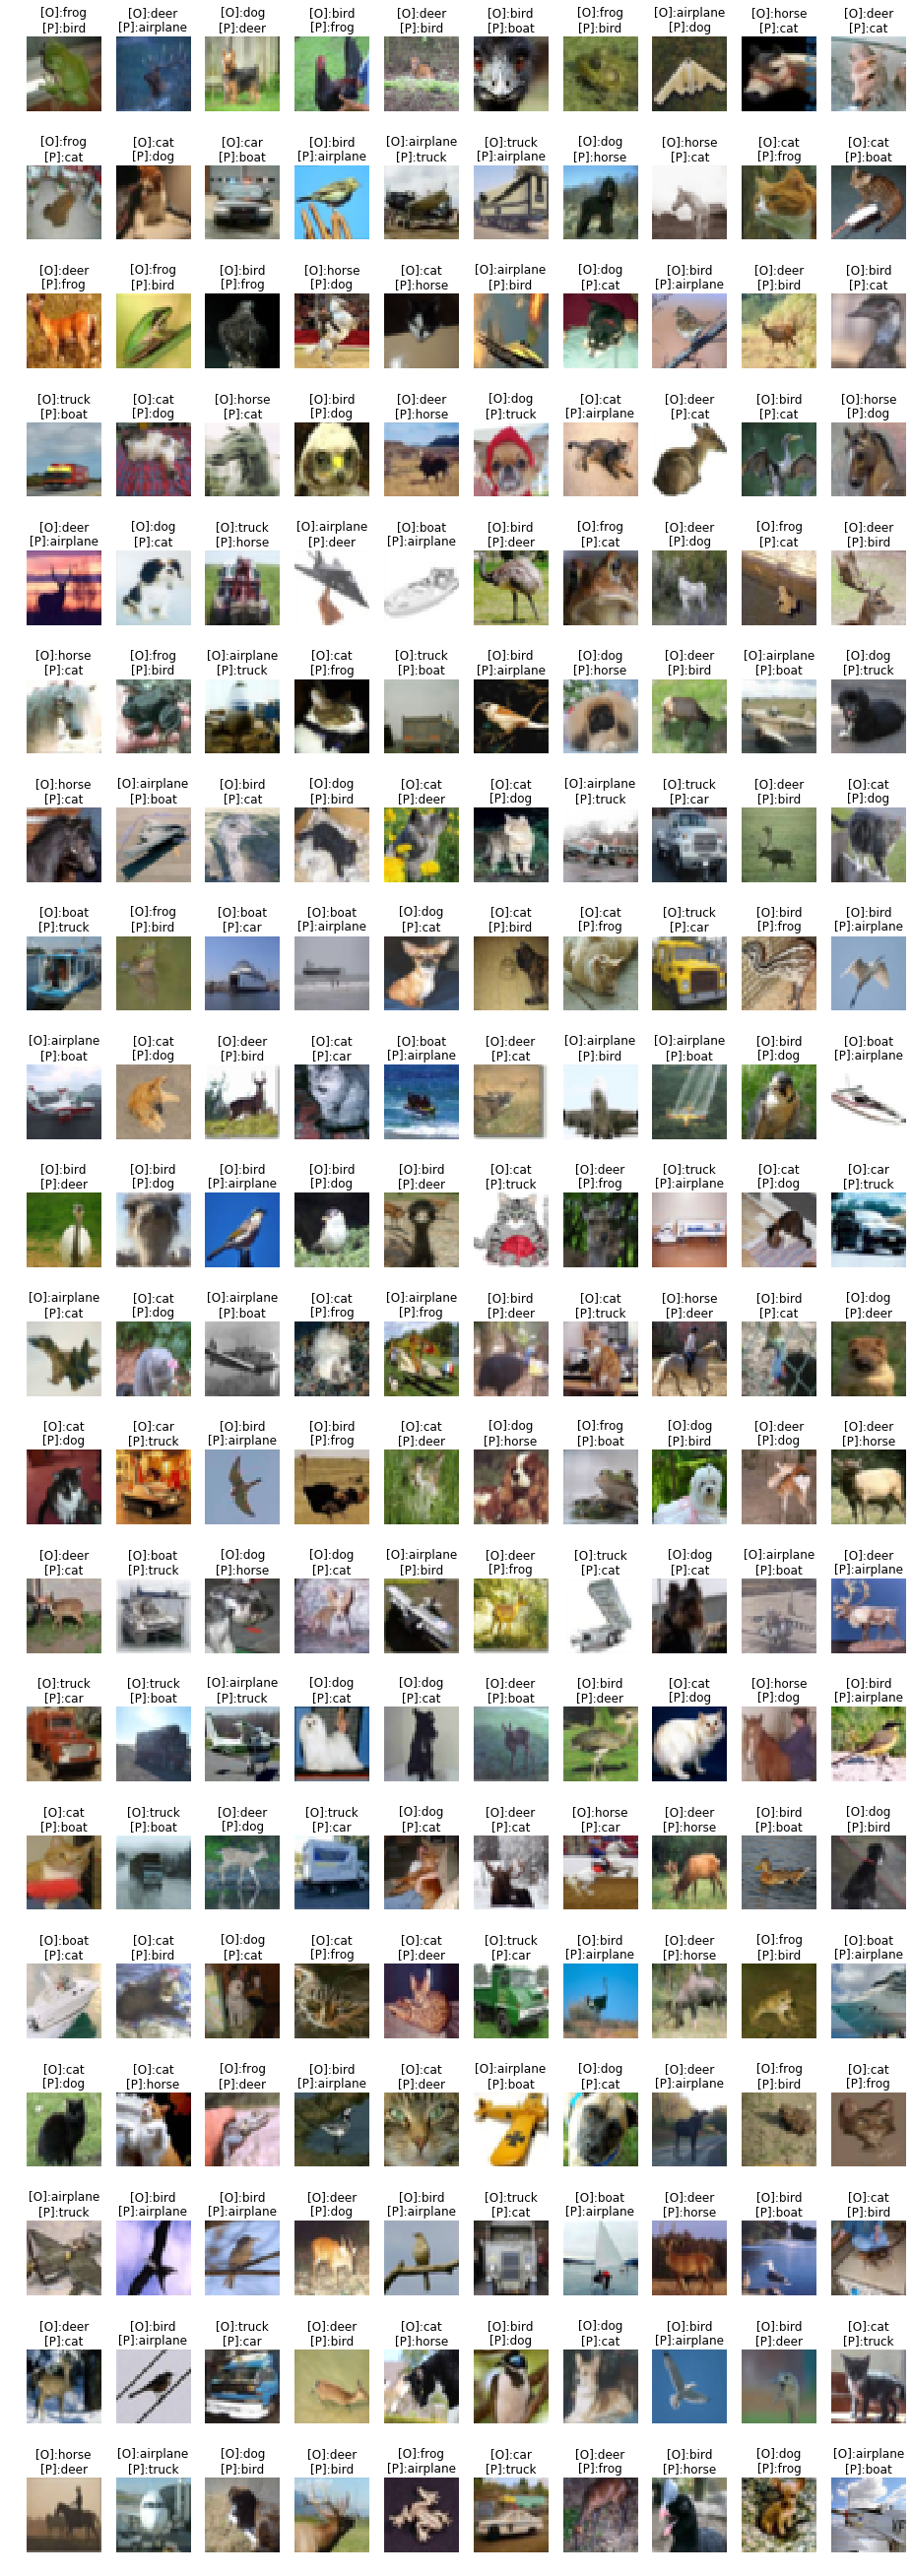

In [48]:
# pre & y_test 都是numpy陣列，才能直接做數字比較
# 找出矩陣中預測錯誤的位置
import numpy as np
# list: list[一個數字]
# numpy array: nparray[[多個數字]]

# pre & y_test兩邊不等處在array中的位置
# y_test要reshape，因為(10000,1)跟(10000,)的shape不一樣
y_test_re = y_test.reshape(10000)
idx = np.nonzero(pre != y_test_re)[0][:200]


# 預測錯誤的圖的原本標籤
false_answer = y_test_re[idx]

# 預測錯誤的圖的預測標籤
false_img = pre[idx]


# 把圖拿出來
imgfalse = x_test[idx]

# matplotlib

plt.figure(figsize=(16,50))
# 每一列就是10個
width = 10
height = int(len(imgfalse)/10)+1
for (i,img) in enumerate(imgfalse):
    # (列數、行數、第幾張圖(i開始))
    plt.subplot(height,width, i+1)
    plt.axis("off")
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[false_img[i]]
#     print(t)
    plt.title(t)
    plt.imshow(img)




In [0]:
# cnn.save("cnn.h5")

In [37]:
from google.colab import drive
drive.mount('/gdrive')
# 保存在雲端硬碟
cnn.save("/gdrive/My Drive/cnn.h5")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
from google.colab import drive
drive.mount('/content/drive')